In [63]:
import numpy
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [112]:
import os
path1 = "guitar.jpg"
if os.path.isfile(path1):
    img1 = cv2.imread(path1, 0)
else:
    print ("The file " + path1 + " does not exist.")
print(type(img1))

<class 'numpy.ndarray'>


In [113]:
edges = cv2.Canny(img1,100,200)
print(type(edges))

<class 'numpy.ndarray'>


(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

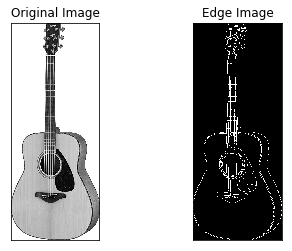

In [114]:
plt.subplot(121),plt.imshow(img1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [115]:
plotting = []
for index, x_axis in enumerate(edges[::-1]):
    for y, x in enumerate(x_axis):
        if x == 255:
            plotting.append((y, index))

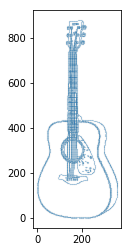

In [117]:
from matplotlib import pyplot
plotting = numpy.array(plotting)
pyplot.figure()
pyplot.scatter(plotting[:, 0], plotting[:, 1], s = 0.001)
pyplot.gca().set_aspect("equal")

In [118]:
filename = "image.js"
outsample = open(filename, mode="w")
outsample.write("let drawing = [ \n")
for coordinate in plotting:
    x = coordinate[0]
    y = coordinate[1]
    outsample.write("{x: %f, y: %f }, \n"%(x, y))
outsample.write("] ;")
outsample.close()